In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Neccessary imports

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

read file

In [6]:
df= pd.read_csv("/content/drive/MyDrive/Predicting City Traffic Flow Based on Weather and Events/cleaned_traffic_weather_data.csv")

display traffic weather data

In [16]:
print(df.head())

   _id_x                     updated_at_x  segment_id  velocity  \
0    495 2020-08-02 23:53:00.662000+00:00        6687         2   
1    496 2020-08-02 23:56:27.919000+00:00       36723        27   
2    497 2020-08-02 23:56:27.920000+00:00       58227        14   
3    498 2020-08-02 23:56:27.920000+00:00       36722        23   
4    499 2020-08-02 23:56:27.920000+00:00       58226        18   

  updated_at_30min          province   max   min  wind wind_d  ...  \
0       2020-08-03  Ho Chi Minh City  29.0  26.0  14.0     SW  ...   
1       2020-08-03  Ho Chi Minh City  29.0  26.0  14.0     SW  ...   
2       2020-08-03  Ho Chi Minh City  29.0  26.0  14.0     SW  ...   
3       2020-08-03  Ho Chi Minh City  29.0  26.0  14.0     SW  ...   
4       2020-08-03  Ho Chi Minh City  29.0  26.0  14.0     SW  ...   

    e_node_id  length  street_id  max_velocity street_level     street_name  \
0  5044255782      14   32580608           NaN            4          Lữ Gia   
1  3116882981     

statistics

In [15]:
df.describe()

,_id_x,segment_id,velocity,max,min,wind,rain,humidi,cloud,pressure,...,_id_y,s_node_id,e_node_id,length,street_id,max_velocity,street_level,_id,long,lat
count,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000,...,26162.000000,2.616200e+04,2.616200e+04,26162.000000,2.616200e+04,1436.000000,26162.000000,2.616200e+04,26162.000000,26162.000000
mean,15059.972556,37309.334531,20.072280,29.105497,25.950807,13.843017,19.433510,82.600069,75.950271,1006.083136,...,37309.334531,4.079558e+09,4.091965e+09,35.821000,2.459429e+08,42.395543,3.446067,4.079558e+09,106.661291,10.768163
std,12826.929305,23669.048783,12.019613,0.676336,0.397408,0.912524,3.133571,2.468211,6.905983,0.538427,...,23669.048783,1.881555e+09,1.882015e+09,36.206948,1.908978e+08,14.249135,0.824086,1.881555e+09,0.021037,0.018175
min,495.000000,33.000000,0.000000,24.000000,18.000000,5.000000,0.000000,56.000000,8.000000,1005.000000,...,33.000000,3.663680e+08,3.663678e+08,0.000000,3.257586e+07,10.000000,1.000000,3.663680e+08,106.537924,10.708894
25%,7035.250000,15037.000000,10.000000,29.000000,26.000000,14.000000,20.000000,83.000000,77.000000,1006.000000,...,15037.000000,2.690660e+09,2.690660e+09,11.000000,3.258753e+07,40.000000,3.000000,2.690660e+09,106.651221,10.758573
50%,13575.500000,37053.000000,20.000000,29.000000,26.000000,14.000000,20.000000,83.000000,77.000000,1006.000000,...,37053.000000,4.865523e+09,4.878047e+09,26.000000,2.211505e+08,40.000000,4.000000,4.865523e+09,106.658796,10.765320
75%,20115.750000,61439.000000,30.000000,29.000000,26.000000,14.000000,20.000000,83.000000,77.000000,1006.000000,...,61439.000000,5.772194e+09,5.772170e+09,48.000000,4.630317e+08,60.000000,4.000000,5.772194e+09,106.667759,10.773318
max,89938.000000,84514.000000,197.000000,37.000000,28.000000,14.000000,31.500000,91.000000,84.000000,1011.000000,...,84514.000000,6.175932e+09,6.175932e+09,489.000000,6.548611e+08,80.000000,4.000000,6.175932e+09,106.847544,10.888305


**Visualize traffic velocity over time**

A line plot visualizing traffic velocity across time helps show how traffic conditions change throughout the day or over multiple days. Peaks and valleys in the plot can highlight rush hours, off-peak times, and any time-based trends or anomalies in traffic speed.

**Use case**: Identify daily traffic patterns, rush hours, and traffic anomalies over time.

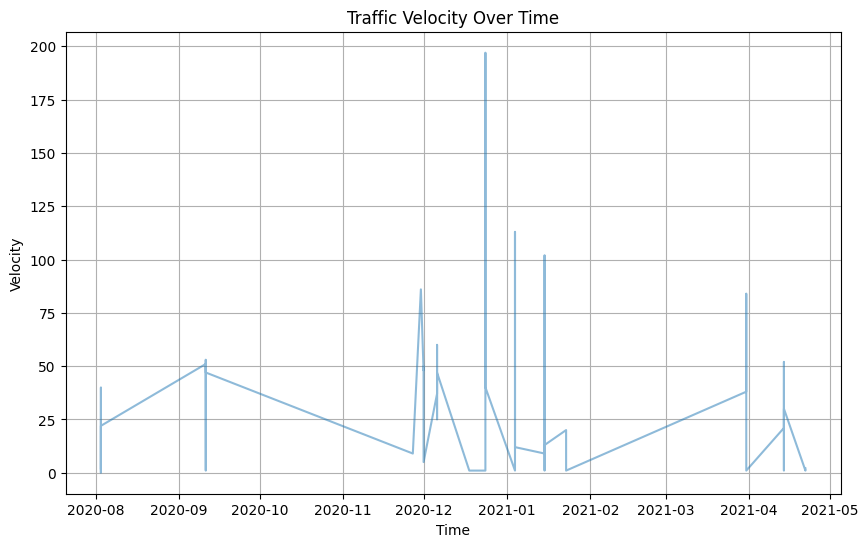

In [10]:
# Convert 'updated_at_x' to datetime with mixed format handling
df['updated_at_x'] = pd.to_datetime(df['updated_at_x'], format='mixed', errors='coerce')


# Line plot for velocity over time
plt.figure(figsize=(10, 6))
plt.plot(df['updated_at_x'], df['velocity'], alpha=0.5)
plt.title('Traffic Velocity Over Time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.grid(True)
plt.show()


**Traffic velocity by street level**

This bar plot shows the average traffic velocity categorized by street level (such as primary, secondary, or tertiary streets). It provides insights into how traffic flows on streets of different importance, with primary streets likely having faster-moving traffic compared to residential or tertiary streets.

**Use case**: Analyze traffic flow by street hierarchy, aiding in traffic planning.

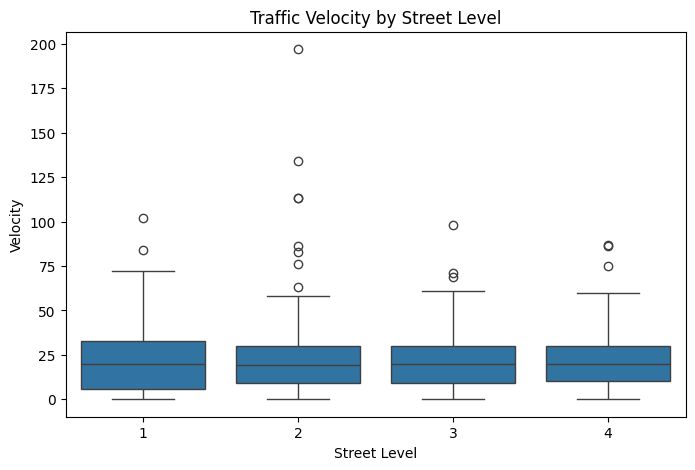

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='street_level', y='velocity', data=df)
plt.title('Traffic Velocity by Street Level')
plt.xlabel('Street Level')
plt.ylabel('Velocity')
plt.show()


**Velocity vs. temperature (Max and Min)**

These scatter or line plots visualize how traffic velocity varies with the maximum and minimum temperatures. The data points can show if extreme temperatures, either high or low, correlate with reduced traffic speed, potentially highlighting how weather affects driving behavior.

**Use case**: Assess how temperature extremes impact overall traffic speed.

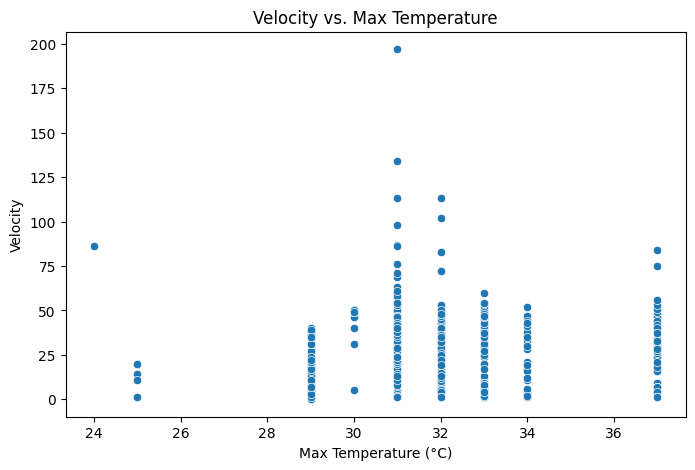

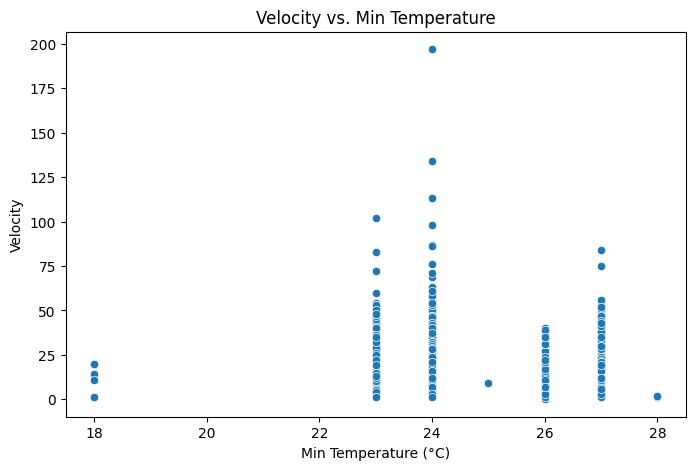

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='max', y='velocity', data=df)
plt.title('Velocity vs. Max Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Velocity')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='min', y='velocity', data=df)
plt.title('Velocity vs. Min Temperature')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Velocity')
plt.show()


**Traffic velocity vs. wind speed**

This scatter plot illustrates the relationship between wind speed and traffic velocity. The points represent individual data observations, with the color or size of the points showing variations by street or time. It helps in understanding if wind speed affects traffic flow, for instance, if strong winds might reduce traffic speeds.

**Use case**: Analyze how environmental factors, like wind, influence traffic flow.

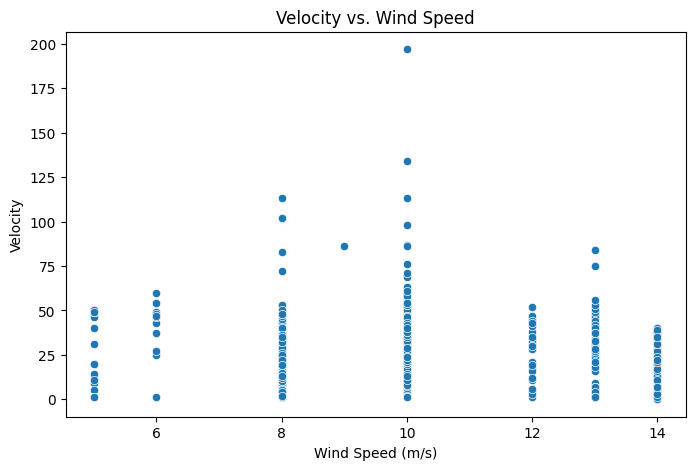

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='wind', y='velocity', data=df)
plt.title('Velocity vs. Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Velocity')
plt.show()


**Geospatial visualization of traffic velocity**

This plot maps the traffic velocity across different geographical points using latitude and longitude. Streets are plotted based on their positions, and the velocity is represented by color intensity or size of points. This helps in identifying areas with slow or fast traffic, giving a clear spatial overview of traffic conditions in the city.

**Use case**: Understand geographic traffic patterns and locate congested areas.

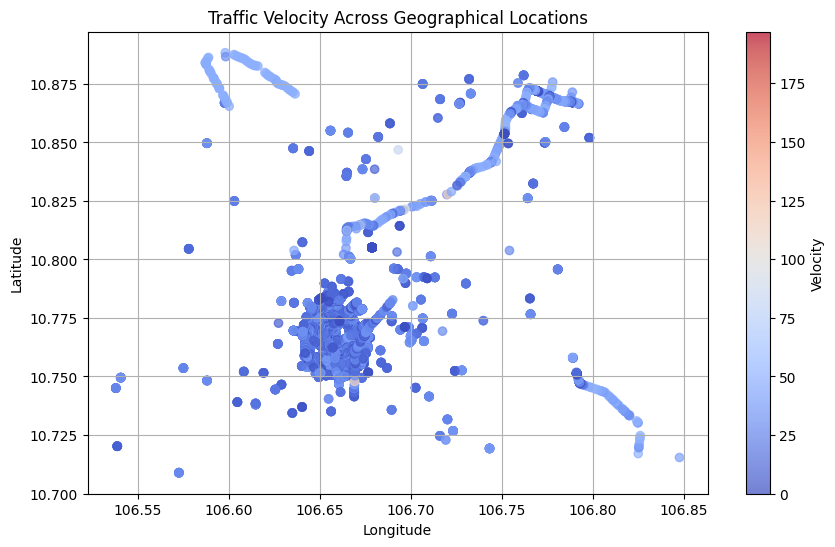

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['long'], df['lat'], c=df['velocity'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Velocity')
plt.title('Traffic Velocity Across Geographical Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


**Top Streets with Most Traffic (Bar Plot)**

This plot will show which streets have the highest traffic volume.

<ipython-input-18-3062b6437cd4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_streets.index, y=top_streets.values, palette="coolwarm")


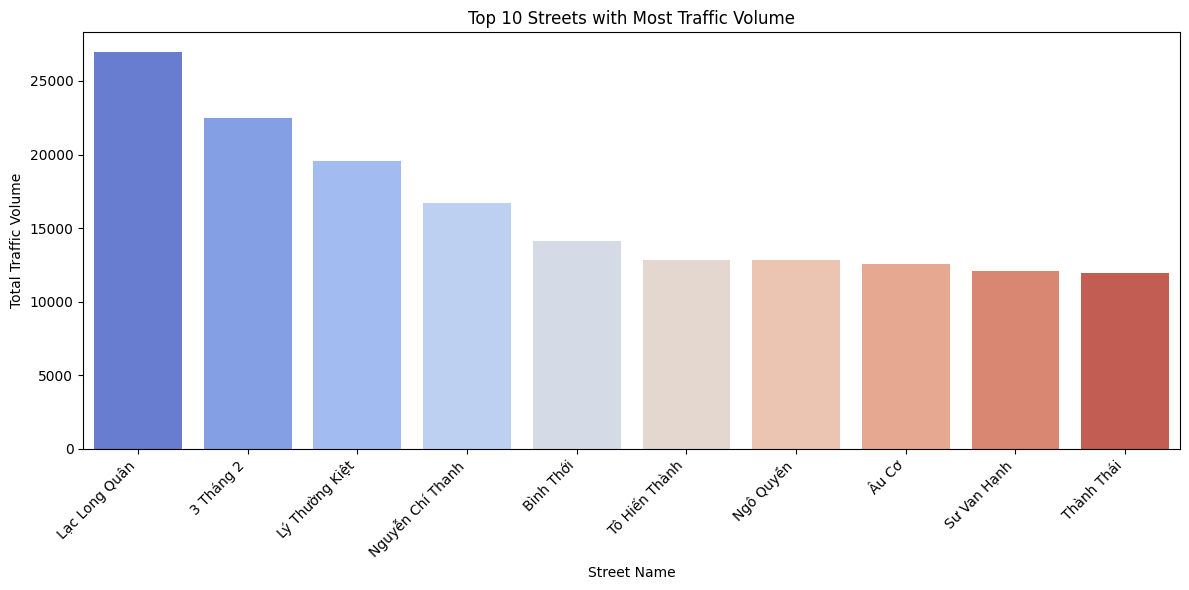

In [18]:
# Filter out rows where street_name is missing
df = df[df['street_name'].notna()]

# Group by street name and sum the velocities to get total traffic volume
top_streets = df.groupby('street_name')['velocity'].sum().sort_values(ascending=False).head(10)

# Plot the top streets
plt.figure(figsize=(12, 6))
sns.barplot(x=top_streets.index, y=top_streets.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Streets with Most Traffic Volume")
plt.xlabel("Street Name")
plt.ylabel("Total Traffic Volume")
plt.tight_layout()
plt.show()


**Traffic Speed on Top Streets Over Time (Line Plot)**

This plot will show how traffic speed changes over time for the top 5 busiest streets.

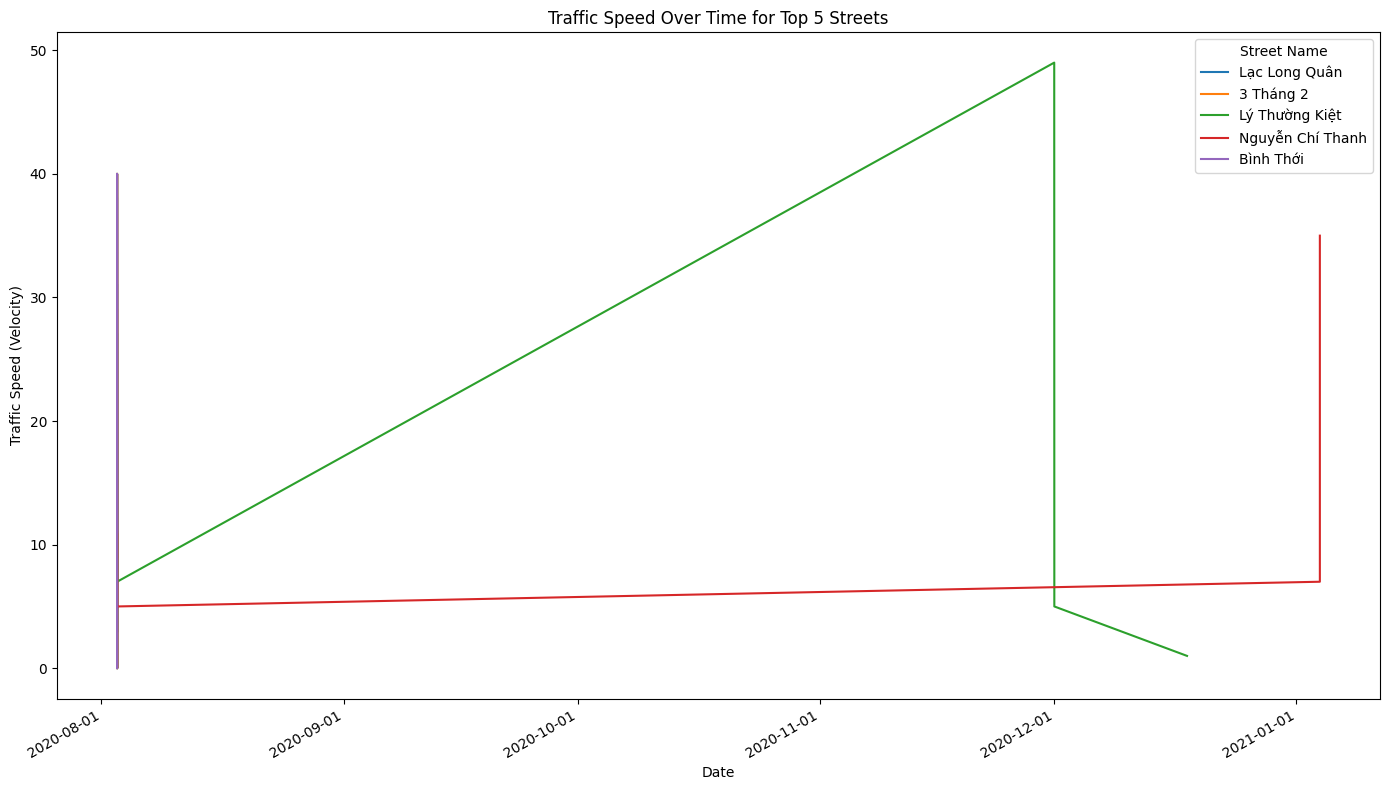

In [19]:
# Get the top 5 streets by traffic volume
top_5_streets = top_streets.index[:5]

# Filter the dataframe for those streets
df_top_streets = df[df['street_name'].isin(top_5_streets)]

# Plot traffic speed over time for each street
plt.figure(figsize=(14, 8))
for street in top_5_streets:
    df_street = df_top_streets[df_top_streets['street_name'] == street]
    plt.plot(df_street['updated_at_x'], df_street['velocity'], label=street)

# Format the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.title("Traffic Speed Over Time for Top 5 Streets")
plt.xlabel("Date")
plt.ylabel("Traffic Speed (Velocity)")
plt.legend(title="Street Name")
plt.tight_layout()
plt.show()


**Heatmap of Traffic Density (Heatmap)**

This heatmap will show the relationship between street_name and average traffic speed (velocity).

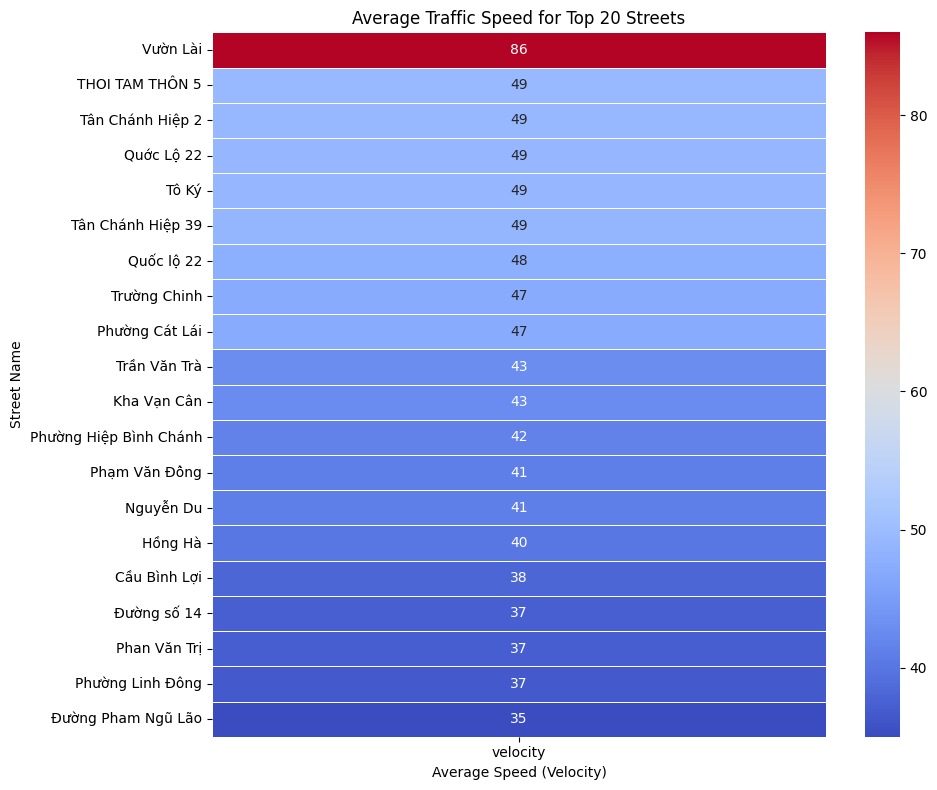

In [20]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='street_name', values='velocity', aggfunc='mean').sort_values(by='velocity', ascending=False).head(20)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Average Traffic Speed for Top 20 Streets")
plt.xlabel("Average Speed (Velocity)")
plt.ylabel("Street Name")
plt.tight_layout()
plt.show()


**Traffic Velocity Distribution by Street**

This plot will show how traffic velocity varies across different streets. It helps in identifying streets with high or low average velocities, which could highlight areas prone to congestion.

<ipython-input-28-60828ed806c6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_velocity_per_street, x='velocity', y='street_name', palette='coolwarm')


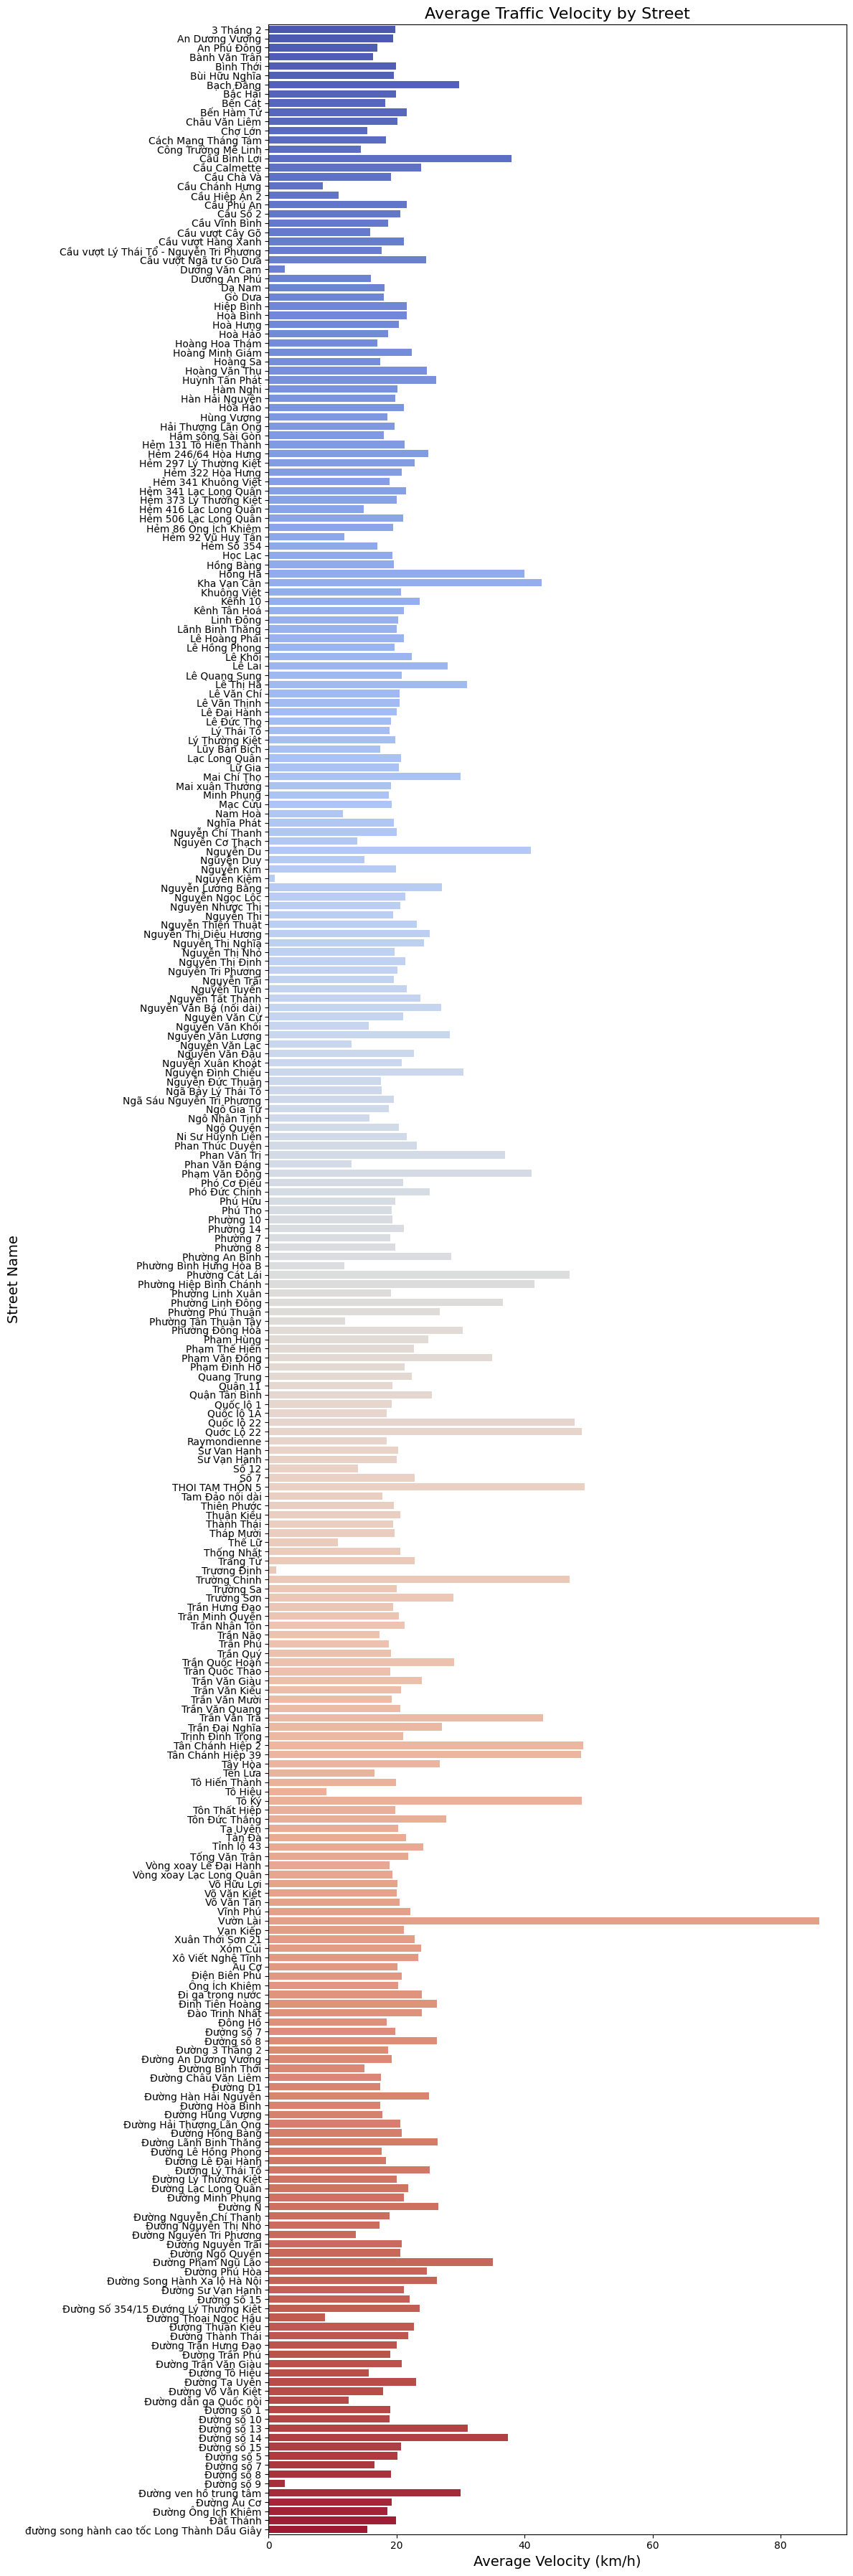

In [28]:
# Group by street name and calculate average velocity
avg_velocity_per_street = df.groupby('street_name')['velocity'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 36))
sns.barplot(data=avg_velocity_per_street, x='velocity', y='street_name', palette='coolwarm')
plt.title('Average Traffic Velocity by Street', fontsize=16)
plt.xlabel('Average Velocity (km/h)', fontsize=14)
plt.ylabel('Street Name', fontsize=14)
plt.tight_layout()
plt.show()

**Traffic Velocity vs. Weather Conditions (Temperature)**

This plot shows how weather conditions (temperature) affect traffic velocity. It helps identify how extreme weather might influence traffic flow.

<ipython-input-31-04111b50c858>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


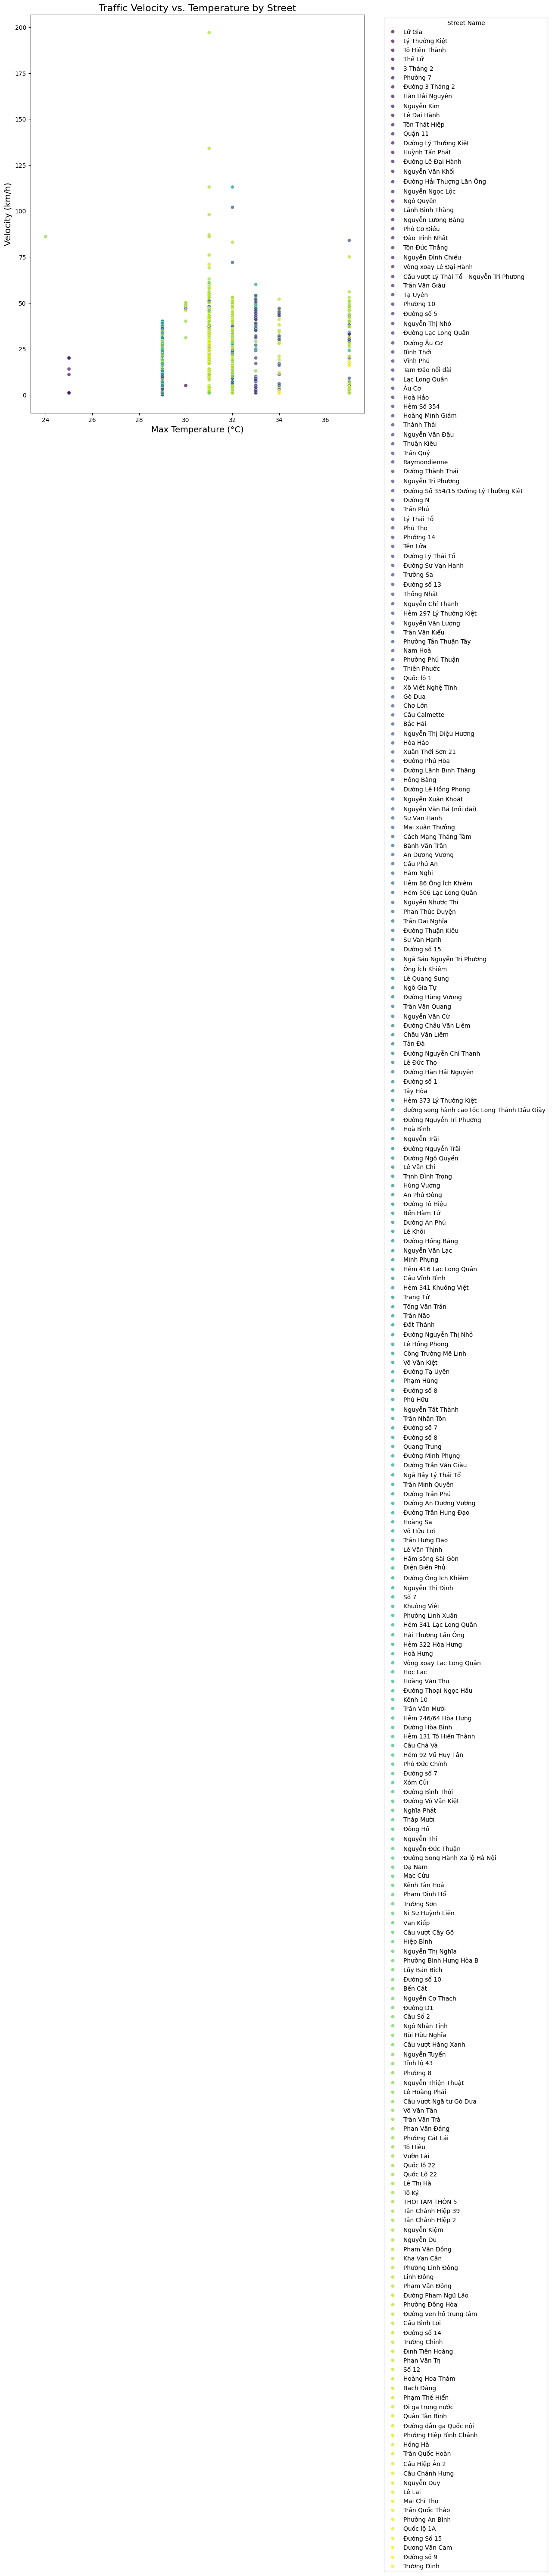

In [31]:
plt.figure(figsize=(10, 12))
sns.scatterplot(data=df, x='max', y='velocity', hue='street_name', palette='viridis', alpha=0.7)
plt.title('Traffic Velocity vs. Temperature by Street', fontsize=16)
plt.xlabel('Max Temperature (°C)', fontsize=14)
plt.ylabel('Velocity (km/h)', fontsize=14)
plt.legend(title='Street Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
